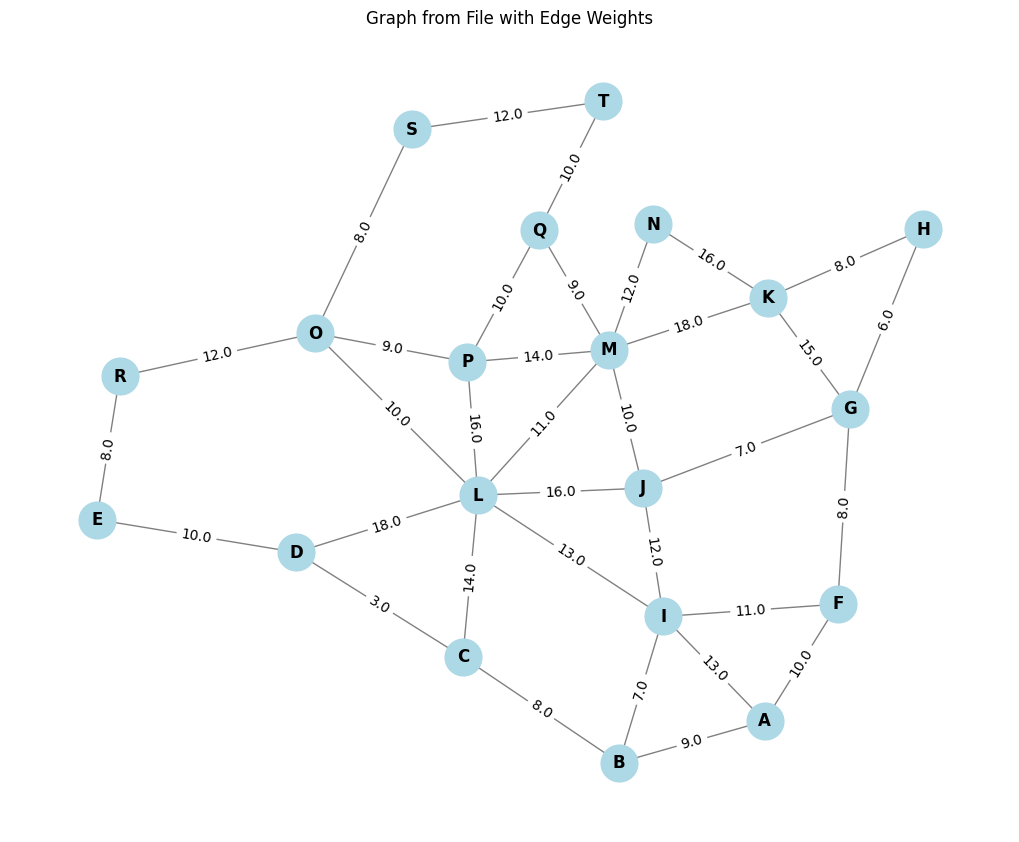

In [1]:
# Exibe o grafo do arquivo graph.txt
from functions import visualizar_grafo
visualizar_grafo("grafo.txt")

In [2]:
from functions import *
np.set_printoptions(threshold=np.inf)

# Utiliza ordem alfabetica para descoberta dos nós
def DFS_limitada(inicial, final, matriz_adj):
    # O limite aumenta até que a solução seja encontrada
    for limite in range(len(matriz_adj)-1):
        # Obs.: Os nós descobertos não estão sendo revisitados por isso a profundidade 4 falha
        descobertos = []
        # Pilha de vertices a serem explorados
        pilha = []
        # Dicionaro com a profundidade de cada vertice
        profundidade = dict()
        
        # Descobre o vertice inicial e o adiciona na pilha para ser explorado
        descobertos.append(inicial)
        pilha.append(inicial)
        profundidade[inicial] = 0 # Profundidade de vertice inicial é zero

        if inicial+1 > len(matriz_adj) or final+1 > len(matriz_adj):
            print("Vertice inicial ou final não existe no grafo")
            return []
        while True:
            # Obtem o primeiro item da pilha
            v = pilha.pop()
            # Obtém os vizinhos do vertice v
            if profundidade[v] + 1 <= limite:
                vizinhos = [i for i in obter_vizinhos(v, matriz_adj) if i not in descobertos]
                for vizinho in vizinhos:
                    # Descobre cada vizinho
                    descobertos.append(vizinho)
                    profundidade[vizinho] = profundidade[v] + 1
                    if vizinho == final:
                        print("Produndidade da Solução: ", profundidade[final])
                        return descobertos
                # Adiciona a lista de vizinhos em ordem inversa na pilha
                pilha += vizinhos[::-1]
            if len(pilha) == 0:
                print(f"Limite {limite}: Sem solução!")
                break

matriz_adj = gerar_matriz_adjacente("grafo.txt")
inicial, final = letter_to_int("G")-1, letter_to_int("S")-1 # Retorna o número correspondente a ordem alfabética

descobertos = DFS_limitada(inicial, final, matriz_adj)

imprimir_resultado(incrementar(descobertos), usarLetras=True)

Limite 0: Sem solução!
Limite 1: Sem solução!
Limite 2: Sem solução!
Limite 3: Sem solução!
Limite 4: Sem solução!
Produndidade da Solução:  5
Descobertos:  ['G', 'F', 'H', 'J', 'K', 'A', 'I', 'B', 'C', 'D', 'L', 'M', 'N', 'P', 'Q', 'O', 'R', 'S']
